In [1]:
%pylab inline


font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


## Basic alogirhtm to found the number of pericenter passages $N_{peri}$, the
## pericenter radius $r_{peri}$, the apocenter radius $r_{apo}$ and the time of pericenter
## and apocenter.

In [2]:
def read_data_sag(filename):
    data = np.loadtxt(filename)
    t = data[:,0]
    x_ngc = data[:,1]
    y_ngc = data[:,2]
    z_ngc = data[:,3]

    vx_ngc = data[:,4]
    vy_ngc = data[:,5]
    vz_ngc = data[:,6]


    x_sag = data[:,7]
    y_sag = data[:,8]
    z_sag = data[:,9]

    vx_sag = data[:,10]
    vy_sag = data[:,11]
    vz_sag = data[:,12]

    r_ngc = np.array([x_ngc, y_ngc, z_ngc]).T
    v_ngc = np.array([vx_ngc, vy_ngc, vz_ngc]).T

    r_sag = np.array([x_sag, y_sag, z_sag]).T
    v_sag = np.array([vx_sag, vy_sag, vz_sag]).T
    
    return t, r_ngc,  v_ngc, r_sag, v_sag


In [118]:
t, r_ngc, v_ngc, r_sag, v_sag = read_data_sag('MWlLMC0Sgr_ICs0.txt')


In [119]:
def orbit_analysis(R_sag):
    """
    Function that computes the pericenters and apocenters of orbits
    
    input: galactocentric distance
    
    output:
    ------
    
    N_peris: Number of percienters.
    t_peri: Time at which the percienters occure.
    r_peri: Radius of pericenters.
    N_apos: Number of apocenters.
    t_apo: Time at which the apocenters occure.
    r_apo: Radius of apocenters.
 
    """
    
    t_peri = []
    r_peri = []
    
    t_apo = []
    r_apo = []
    for i in range(1,len(R_sag)-1,2):
        # The condition bellow can be accomplish by two nearby points 
        # therefore doing the increase by more than 1 is better.
        # the lower the resoution in time the decrease the number.
        if ((R_sag[i]<R_sag[i+2]) & (R_sag[i]<R_sag[i-2])):
            # 
            r_peri.append(R_sag[i])
            t_peri.append(t[i])
            
            
        if ((R_sag[i]>R_sag[i+2]) & (R_sag[i]>R_sag[i-2])):
            # 
            r_apo.append(R_sag[i])
            t_apo.append(t[i])
            
    N_peris = len(t_peri)
    N_apos = len(t_apo)

    return N_peris, t_peri, r_peri, N_apos, t_apo, r_apo

In [123]:
R_sag = (r_sag[:,0]**2+r_sag[:,1]**2+r_sag[:,2]**2)**0.5
%time Nperi, tperi, rperi, Napo, tapo, rapo = orbit_analysis(R_sag) 
print(Nperi, Napo)

CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 2.39 ms
3 2


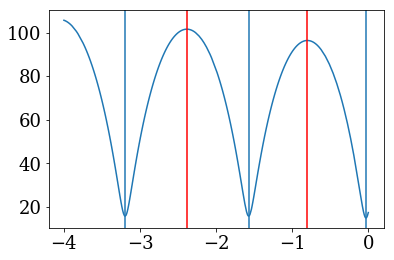

In [122]:
plot(t,(r_sag[:,0]**2+r_sag[:,1]**2+r_sag[:,2]**2)**0.5)
for i in range(len(tperi)):
    plt.axvline(tperi[i])
    
for i in range(len(tapo)):
    plt.axvline(tapo[i], c='r') 

In [127]:
np.mean(rperi)
np.mean(rapo)

98.959418606059444